In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define the data structure
data = {
    "Doc/Chart/Screen": {
        "AI2D (GPT4V Detailed Caption)": 4874,
        "AI2D (InternVL)": 12413,
        "AI2D (Original)": 3247,
        "Chart2Text": 26961,
        "ChartQA": 18317,
        "Diagram Image2Text": 300,
        "Doc-VQA": 10194,
        "DVQA": 20000,
        "FigureQA": 1000,
        "HiTab": 2500,
        "Infographic VQA": 4404,
        "LRV Chart": 1787,
        "RoBUT SQA": 8514,
        "RoBUT WikiSQL": 74989,
        "RoBUT WTQ": 38246,
        "Screen2Words": 15730,
        "TQA": 1365,
        "UReader Caption": 91439,
        "UReader IE": 17327,
        "UReader KG": 37550,
        "UReader QA": 252954,
        "VisualMRC": 3027,
    },
    "General": {
        "ALLaVA Instruct": 50000 + 20000,
        "AOKVQA": 66160,
        "Cambrian (filtered)": 83131,
        "CLEVR": 700,
        "COCO Caption": 20000,
        "Hateful Memes": 8500,
        "IconQA": 2494,
        "Image Textualization": 99583,
        "LLaVA-158K": 158000,
        "LLaVA-Wild (train)": 54517,
        "LLaVAR": 20000,
        "OKVQA": 8998,
        "RefCOCO": 50586,
        "ScienceQA": 4976,
        "ShareGPT4O": 57289,
        "ShareGPT4V": 50027 + 1998 + 30000 + 9000,
        "ST-VQA": 17247,
        "TallyQA": 9868,
        "Vision FLAN": 186070,
        "Visual7W": 14366,
        "VisText": 9969,
        "VizWiz": 6614,
        "VQARAD": 313,
        "VQAv2": 82783,
        "VSR": 2157,
        "WebSight": 10000,
        "InterGPS": 1280,
    },
    "Pure Language": {
        "Magpie Pro (L3 MT)": 149999,
        "Magpie Pro (L3 ST)": 150000,
        "Magpie Pro (Qwen2 ST)": 149996,
    },
    "Math/Reasoning": {
        "CLEVR-Math": 5290,
        "Geo170K Align": 60252,
        "Geo170K QA": 67833,
        "Geometry3K": 2101,
        "GEOS": 508,
        "Geometry3K (MathV360K)": 9734,
        "GeoMVerse (MathV360K)": 9303,
        "GeoQA+ (MathV360K)": 17172,
        "MapQA (MathV360K)": 5235,
        "MaVIS MetaGen": 87358,
        "MaVIS Rule/Geo": 100000,
        "MathQA": 29837,
        "Super-CLEVR": 8652,
        "TabMWP": 45184,
        "UniGeo": 11959,
        "GQA": 72140,
        "LRV Normal": 10500,
        "RAVEN": 2100,
        "Visual Genome": 86417,
    },
    "General OCR": {
        "ChromeWriting": 8835,
        "HME100K": 74502,
        "IIIT5K": 2000,
        "IAM": 5663,
        "K12 Printing": 12832,
        "OCR-VQA": 80000,
        "Rendered Text": 10000,
        "SynthDog-EN": 40093,
        "TextCaps": 21952,
        "TextOCR": 25114,
    },
}

# Calculate sizes and prepare colors
outer_sizes = [sum(inner.values()) for inner in data.values()]
outer_labels = list(data.keys())
outer_colors = [
    "#64b5f6",
    "#f28e2b",
    "#e15759",
    "#76b7b2",
    "#92c952",
    "#a5b3cc",
    "#f46d43",
    "#d53e4f",
    "#946dd6",
    "#4c72b0",
    "#4373c3",
    "#548dd4",
    "#64b5f6",
    "#73c6ec",
    "#81d4fa",
    "#9575cd",
    "#a5b3cc",
    "#b3cde3",
    "#c2e2e5",
    "#d1ecf1",
    "#e0f7fa",
    "#f0f8ff",
]

inner_sizes = [size for inner in data.values() for size in inner.values()]
inner_labels = [
    f"{outer}: {inner}"
    for outer, inner_dict in data.items()
    for inner in inner_dict.keys()
]

# Create gradient colors for inner pie
inner_colors = []
for i, (outer, inner_dict) in enumerate(data.items()):
    base_color = mcolors.to_rgb(outer_colors[i])
    n_inner = len(inner_dict)
    for j in range(n_inner):
        # Create a gradient from the base color to white
        inner_color = [
            base_color[k] + (1 - base_color[k]) * (j / (n_inner - 1)) * 0.8
            for k in range(3)
        ]
        inner_colors.append(inner_color)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12), dpi=300)

# Outer pie chart
outer_wedges, _ = ax.pie(
    outer_sizes,
    colors=outer_colors,
    wedgeprops=dict(width=0.3, edgecolor="white"),
    radius=1
)

# Inner pie chart (remove autopct)
inner_wedges, _ = ax.pie(
    inner_sizes,
    colors=inner_colors,
    radius=0.7,
    wedgeprops=dict(width=0.3, edgecolor="white"),
)

# Ensure the pie chart is circular
plt.axis("equal")

# Show the plot
plt.tight_layout()
plt.savefig("llava_ov_plot.png")

# LLaVA OneVision Data Visualization Scripts

This notebook contains visualization scripts for creating various plots related to the LLaVA OneVision model training and evaluation data.

## 1. OneVision Training Data Distribution by Category

This plot visualizes the distribution of training data across different categories including:
- **Doc/Chart/Screen**: Document understanding, chart analysis, and screen content datasets
- **General**: General vision-language datasets
- **Pure Language**: Language-only instruction data
- **Math/Reasoning**: Mathematical and reasoning datasets
- **General OCR**: Optical character recognition datasets

The nested pie chart shows both the high-level category distribution (outer ring) and individual dataset contributions (inner ring).

Total samples: 1304505
Single-image: 406708 (31.18%)
Multi-image: 560430 (42.96%)
Video: 337367 (25.86%)


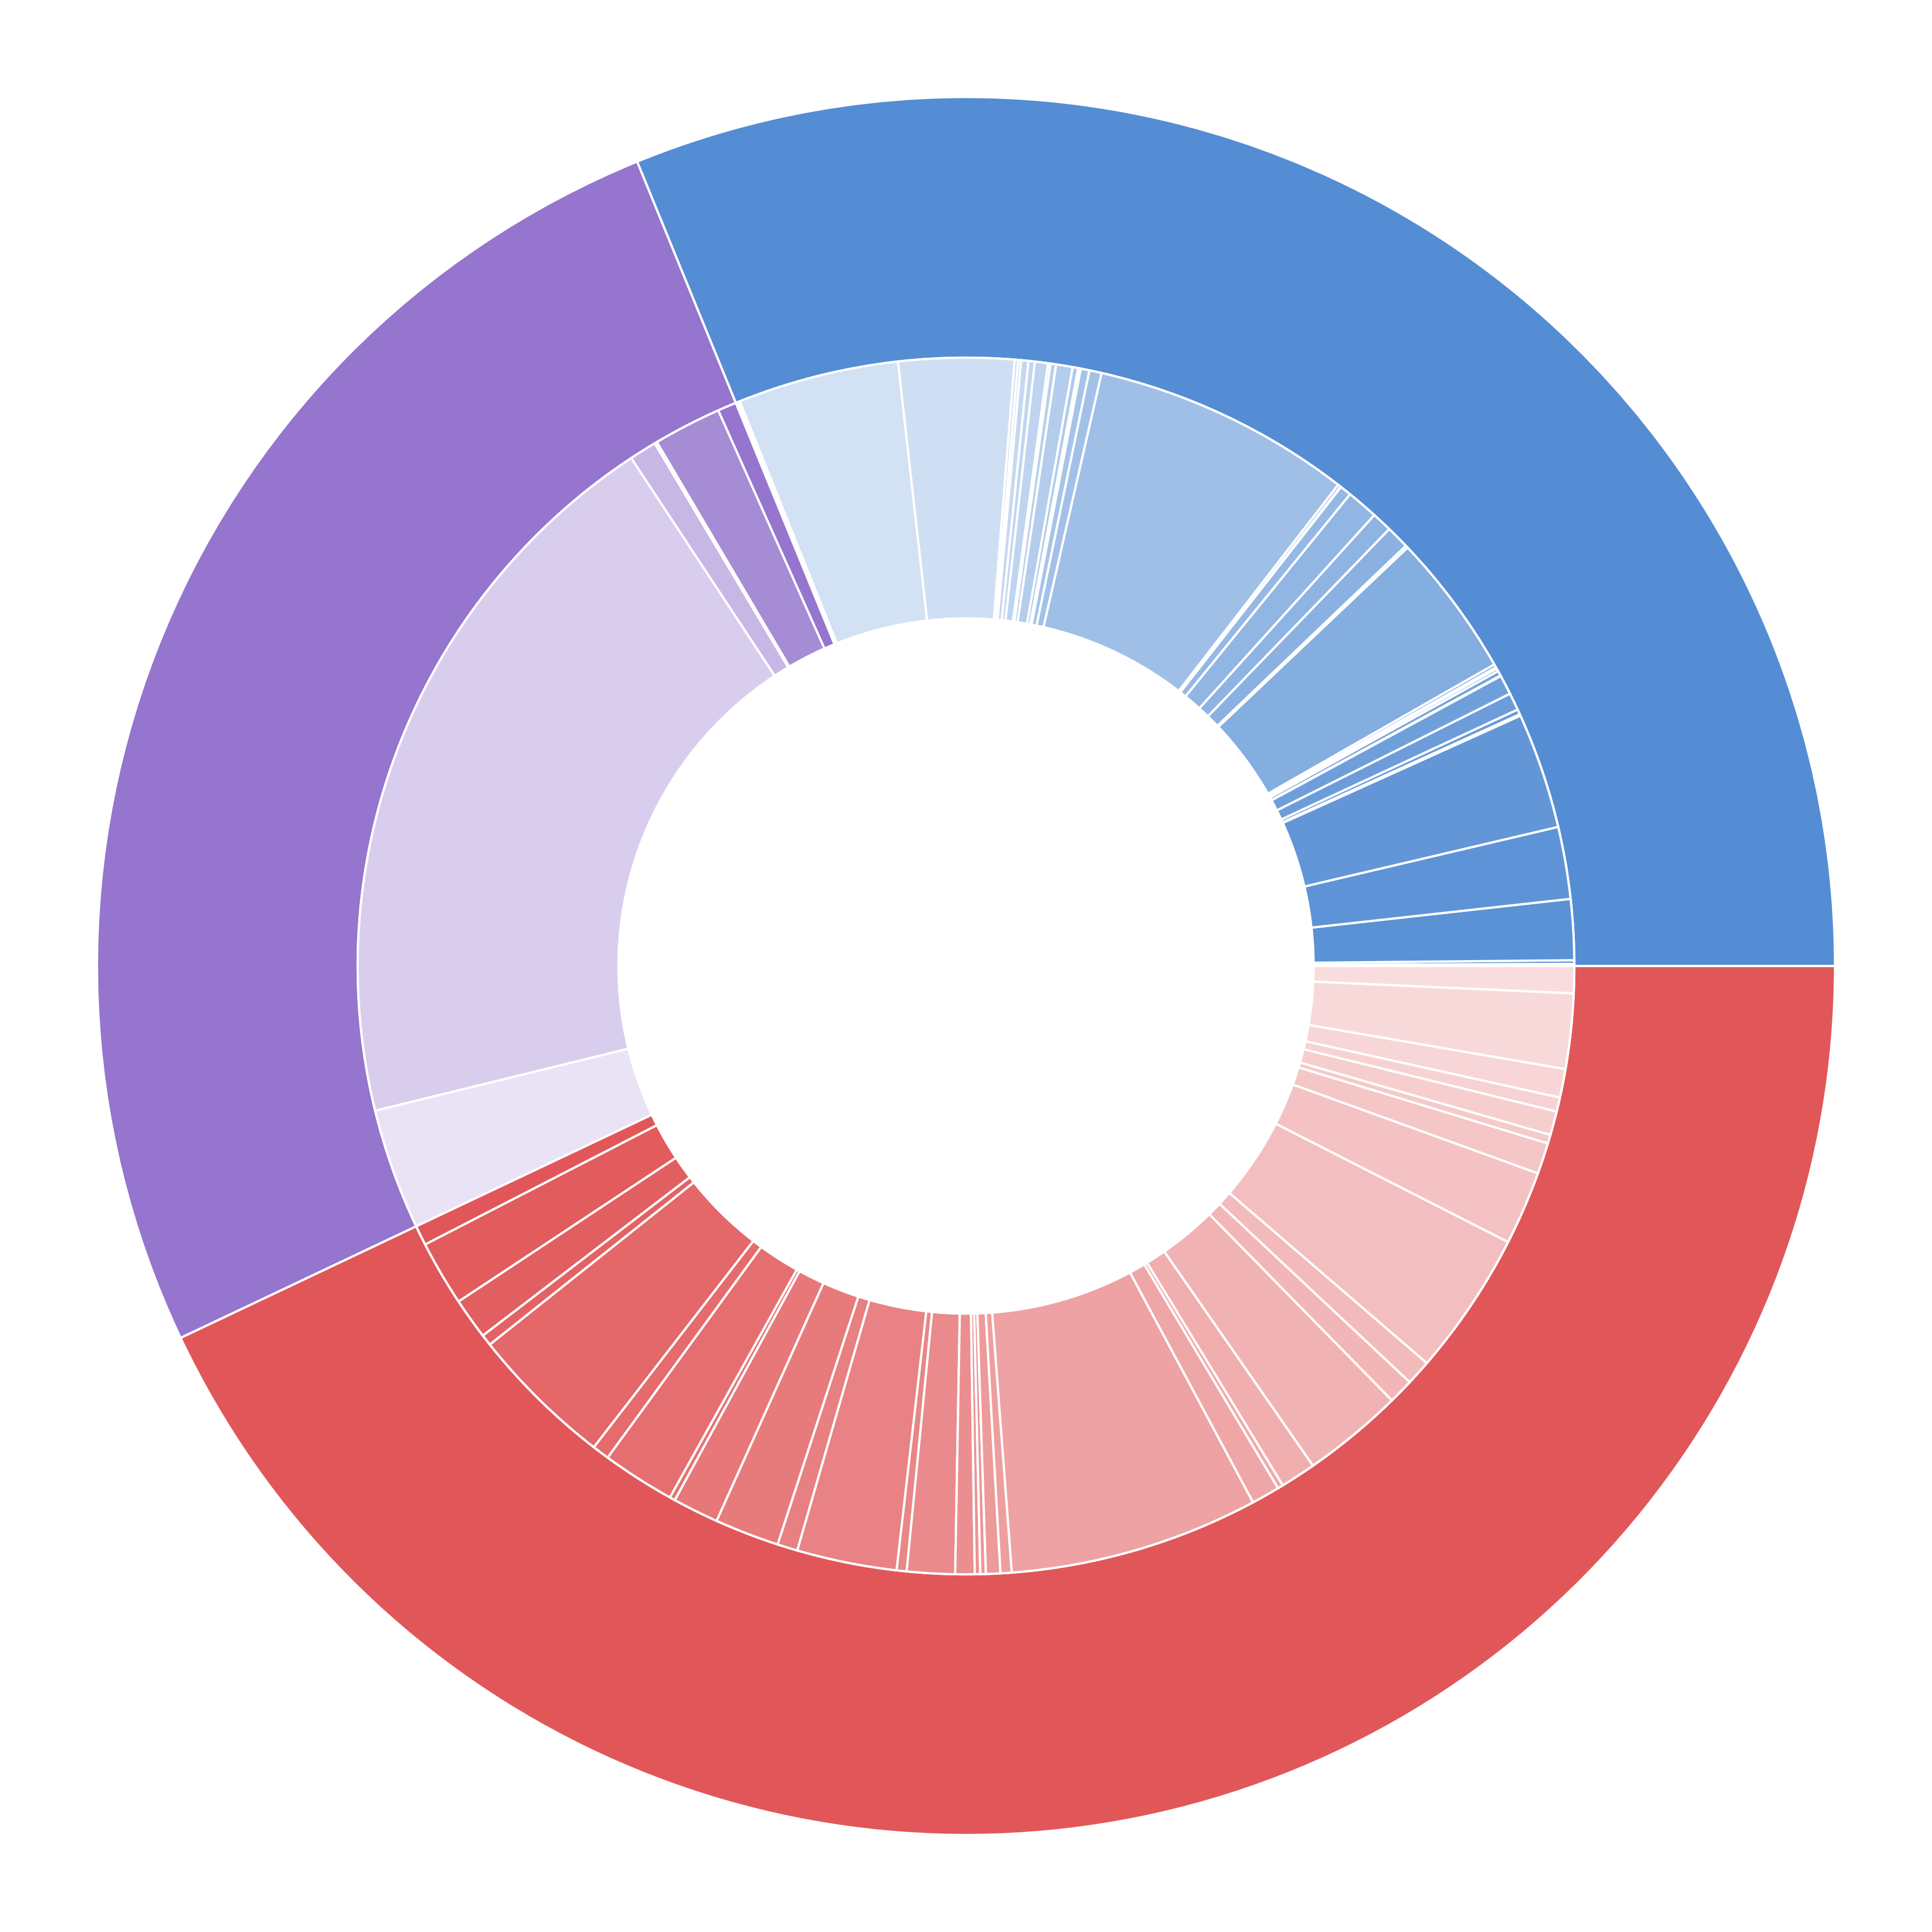

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define the data structure
data = {
    "Image": {
        "AI2D (GPT4V)": 487 + 243,
        "AI2D (InternVL)": 1241,
        "ALLaVA Inst.": 6000 + 15000,
        "Cambrian (filtered GPT4o)": 24939,
        "Cauldron": 40157,
        "CLEVR-Math": 529,
        "FigureQA": 1759,
        "Geo170K-Align": 6025,
        "Geo170K-QA": 6783,
        "Geo3K": 210,
        "GeoQA+": 1717,
        "Geometry3K": 973,
        "GEOS": 508,
        "IconQA": 1129,
        "Image Textualization": 49791,
        "InfoVQA": 440 + 211 + 199,
        "LAION-GPT4V": 8048,
        "LLAVA-158K": 6989,
        "LLAVA-Wild (train)": 7877 + 3026,
        "LLAVAR GPT4": 3960,
        "LRV-Chart": 178,
        "LRV-Normal (filtered)": 1050,
        "Magpie Pro": 29999 + 30000 + 29999,
        "MapQA": 523 + 3741,
        "MathQA": 2983,
        "PlotQA": 548,
        "PMC-VQA": 359,
        "ScienceQA": 1921,
        "ShareGPT4o": 5728,
        "ShareGPT4V": 5002 + 1998 + 3000 + 9000,
        "ShareGPT4V": 1926,
        "Super-CLEVR": 865,
        "TabMWP": 2246 + 2272,
        "TextCaps": 2195,
        "TextOCR (GPT4V)": 2511,
        "TQA": 1018,
        "UniGeo": 1195,
        "UReader": 25295 + 9143 + 1732 + 3755,
        "Vision FLAN (filtered)": 55821,
        "VizWiz": 661,
        "VQA-AS": 590,
        "VQA-RAD": 213,
    },
    "Video": {
        "ActivityNet": 6514,
        "Charades": 23603,
        "Ego4D": 831,
        "NextQA": 9489,
        "ShareGPT4Video": 255000,
        "Youcook2": 41930,
    },
    "Multi-image": {
        "AESOP": 6914,
        "ALFRED": 22564,
        "Birds-to-Words": 14280,
        "CLEVR-Change": 3884,
        "Co-Instruct": 49999,
        "COMICS_Dialogue": 5899,
        "ContrastiveCaption": 25239,
        "DocVQA (MI)": 1899,
        "DreamSim": 15940,
        "FlintstonesSV": 22340,
        "HQ-Edit-Diff": 6999,
        "IconQA": 34602,
        "IEdit": 3455,
        "ImageCode": 16593,
        "MagicBrush-Diff": 6697,
        "MIT-PropertyCoherence": 1899,
        "MIT-StateCoherence": 1899,
        "MultiVQA": 4992,
        "NextQA": 3869,
        "NLVR": 86372,
        "nuScenes": 9805,
        "OCR-VQA (MI)": 1899,
        "PororoSV": 12298,
        "RAVEN": 34999,
        "RecipeQA_ImageCoherence": 8698,
        "RecipeQA-VisualCloze": 8733,
        "ScanNet": 49889,
        "ScanQA": 25562,
        "Spot-the-Diff": 10773,
        "Star": 3031,
        "TQA (MI)": 8248,
        "VizWiz (MI)": 4899,
        "VISION": 9899,
        "VIST": 26025,
        "WebQA": 9337,
    },
}

# Calculate total samples for each category
total_image = sum(data["Image"].values())
total_multi_image = sum(data["Multi-image"].values())
total_video = sum(data["Video"].values())

# Calculate grand total
grand_total = total_image + total_multi_image + total_video

# Calculate percentages
percent_image = (total_image / grand_total) * 100
percent_multi_image = (total_multi_image / grand_total) * 100
percent_video = (total_video / grand_total) * 100

print(f"Total samples: {grand_total}")
print(f"Single-image: {total_image} ({percent_image:.2f}%)")
print(f"Multi-image: {total_multi_image} ({percent_multi_image:.2f}%)")
print(f"Video: {total_video} ({percent_video:.2f}%)")

# Calculate sizes and prepare colors
outer_sizes = [sum(inner.values()) for inner in data.values()]
outer_labels = list(data.keys())
outer_colors = [
    "#548dd4",
    "#9575cd",
    "#e15759",
    "#76b7b2",
    "#92c952",
    "#a5b3cc",
    "#f46d43",
    "#d53e4f",
    "#946dd6",
    "#4c72b0",
    "#4373c3",
    "#64b5f6",
    "#73c6ec",
    "#81d4fa",
    "#a5b3cc",
    "#b3cde3",
    "#c2e2e5",
    "#d1ecf1",
    "#e0f7fa",
    "#f0f8ff",
]

inner_sizes = [size for inner in data.values() for size in inner.values()]
inner_labels = [
    f"{outer}: {inner}"
    for outer, inner_dict in data.items()
    for inner in inner_dict.keys()
]

# Create gradient colors for inner pie
inner_colors = []
for i, (outer, inner_dict) in enumerate(data.items()):
    base_color = mcolors.to_rgb(outer_colors[i])
    n_inner = len(inner_dict)
    for j in range(n_inner):
        # Create a gradient from the base color to white
        inner_color = [
            base_color[k] + (1 - base_color[k]) * (j / (n_inner - 1)) * 0.8
            for k in range(3)
        ]
        inner_colors.append(inner_color)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12), dpi=300)

# Outer pie chart
outer_wedges, outer_texts = ax.pie(
    outer_sizes,
    # labels=outer_labels
    colors=outer_colors,
    wedgeprops=dict(width=0.3, edgecolor="white"),
    textprops={"fontsize": 20},  # Increase font size for labels
)

# Inner pie chart (remove autopct)
inner_wedges, inner_texts = ax.pie(
    inner_sizes,
    colors=inner_colors,
    radius=0.7,
    wedgeprops=dict(width=0.3, edgecolor="white"),
)

# Ensure the pie chart is circular
plt.axis("equal")

# Show the plot
plt.tight_layout()
plt.savefig("llava_ov_plot_stage.png")

## 2. Training Data Distribution by Modality

This plot shows the distribution of training data across different modalities:
- **Single-image**: Traditional single image datasets
- **Multi-image**: Datasets with multiple images per sample
- **Video**: Video understanding datasets

The visualization calculates and displays the total number of samples and percentage breakdown for each modality type.

In [9]:
total = (2696 + 1826 + 300 + 850 + 250 + 566 + 211 + 128 + 1000 + 851 + 7498 + 3824 + 
         1573 + 9868 + 1724 + 2730 + 1436 + 302 + 313 + 215 + 996 + 1000)

print(f"Total: {total}")

Total: 40157


## 3. Cauldron Dataset Composition Check

Quick calculation to verify the total number of samples in the Cauldron dataset.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

path = "./hike_data.csv"
data = pd.read_csv(path)
data.head()

data["region"] = data["location"].str.split("--", n=1, expand=True)[0]

# Make sure there's no leading/trailing whitespace
data["region"] = data["region"].str.strip()

# Make sure to use .astype(Float) so it is numeric.
data["length_num"] = data["length"].str.split(" ", n=1, expand=True)[0].astype(float)

summary_stats = (
    data.groupby(["region"])
    .agg(sum_length=("length_num", "sum"), mean_gain=("gain", "mean"))
    .reset_index()
)

summary_stats["mean_gain"] = summary_stats["mean_gain"].round(0)

trackNrs = data.groupby("region").size().to_frame("n").reset_index()

summary_all = pd.merge(summary_stats, trackNrs, "left", on="region")
summary_all.head()

# Bars are sorted by the cumulative track length
df_sorted = summary_all.sort_values("sum_length", ascending=False)

# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)

# Cumulative length
LENGTHS = df_sorted["sum_length"].values

# Mean gain length
MEAN_GAIN = df_sorted["mean_gain"].values

# Region label
REGION = df_sorted["region"].values

# Number of tracks per region
TRACKS_N = df_sorted["n"].values

GREY12 = "#1f1f1f"

import matplotlib.font_manager as fm

# Add the font file
font_path = "/Users/luodian/Downloads/codes/ov_paper_plots/Bell MT.ttf"  # Replace with the actual path to your font file
fm.fontManager.addfont(font_path)

# Set the font family
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#6C5B7B", "#C06C84", "#F67280", "#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=TRACKS_N.min(), vmax=TRACKS_N.max())

# Normalized colors. Each number of tracks is mapped to a color in the
# color scale 'cmap'
COLORS = cmap(norm(TRACKS_N))

# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"}, dpi=300)

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-1500, 3500)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

# Add dots to represent the mean gain
ax.scatter(ANGLES, MEAN_GAIN, s=60, color=GREY12, zorder=11)


# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word,
# but the 'break_long_words' means we don't want to break words
# longer than 5 characters.
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]
REGION

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=12)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

# Dummy data in dictionary format
accessible_data = {
    "regions": [
        "VQAv2",
        "GQA",
        "AOKVQA",
        "OKVQA",
        "PathVQA",
        "ChartQA",
        "DocVQA",
        "InfoVQA",
        "LRV-Chart",
        "LRV-Normal",
    ],
    "numbers": {
        "sum_length": [1200, 1000, 800, 750, 600, 550, 500, 450, 400, 350],
        "mean_gain": [1500, 1300, 1100, 1000, 900, 800, 700, 600, 500, 400],
        "track_count": [100, 90, 80, 70, 60, 50, 40, 30, 20, 10],
    },
    "category": "Hiking Trails",
}

# Constants and color settings
GREY12 = "#1f1f1f"
COLORS = ["#6C5B7B", "#C06C84", "#F67280", "#F8B195"]

# Font settings
font_path = "/Users/luodian/Downloads/codes/ov_paper_plots/Bell MT.ttf"
fm.fontManager.addfont(font_path)
plt.rcParams.update({"font.family": "Bell MT"})
plt.rcParams["text.color"] = GREY12
plt.rc("axes", unicode_minus=False)

# Prepare data for plotting
ANGLES = np.linspace(
    0.05, 2 * np.pi - 0.05, len(accessible_data["regions"]), endpoint=False
)
LENGTHS = accessible_data["numbers"]["sum_length"]
MEAN_GAIN = accessible_data["numbers"]["mean_gain"]
REGION = accessible_data["regions"]
TRACKS_N = accessible_data["numbers"]["track_count"]

# Create colormap and normalize colors
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)
norm = mpl.colors.Normalize(vmin=min(TRACKS_N), vmax=max(TRACKS_N))
COLORS = cmap(norm(TRACKS_N))

# Create the plot
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"}, dpi=200)

# Set background colors
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# Configure the polar plot
ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-1500, 3500)

# Add bars for cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Add dashed reference lines
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

# Add dots for mean gain
ax.scatter(ANGLES, MEAN_GAIN, s=60, color=GREY12, zorder=11)

# Prepare and set region labels
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=16)
ax.set_title("OneVision 3M (demo test)", fontsize=28, pad=20)
# Show the plot
plt.savefig("./llava_ov_plot.png", bbox_inches="tight")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Data
categories = [
    "VQA",
    "GQA",
    "AOKVQA",
    "OKVQA",
    "PathVQA",
    "ChartQA",  # Image
    "DocVQA",
    "InfoVQA",
    "TextVQA",
    "ST-VQA",
    "OCR-VQA",
    "IIIT-Text",  # Multi-image
    "TVQA",
    "MovieQA",
    "TGIF-QA",
    "MSVD-QA",
    "MSRVTT-QA",
    "ActivityNet-QA",  # Video
]
model1 = [8, 7, 6, 7, 8, 9, 7, 8, 9, 8, 7, 6, 5, 6, 7, 8, 7, 6]
model2 = [7, 8, 9, 8, 7, 6, 8, 7, 6, 7, 8, 9, 7, 8, 9, 7, 6, 8]
model3 = [9, 8, 7, 9, 8, 7, 9, 8, 7, 9, 8, 7, 9, 8, 7, 9, 8, 7]

# Number of categories
N = len(categories)

# Create angles for each category
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Repeat the first angle to close the polygon

# Extend data to close the polygon
model1 += model1[:1]
model2 += model2[:1]
model3 += model3[:1]

# Set up the plot
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection="polar"), dpi=240)

# Define colors for each meta-category
meta_colors = ["#7c7c7c", "#eee5e9", "#cf5c36"]  # Light pink, light green, light blue

# Define the number of categories in each meta-category
image_count = 6
multi_image_count = 6
video_count = 6

# Generate colors for each category
colors = (
    [meta_colors[0]] * image_count
    + [meta_colors[1]] * multi_image_count
    + [meta_colors[2]] * video_count
)

# Plot background colors for each category
for i in range(N):
    ax.fill_between([angles[i], angles[i + 1]], 0, 10, alpha=0.3, color=colors[i])

# Plot data

ax.plot(angles, model2, "o-", linewidth=2, color="#457b9d", label="Model 2")
ax.fill(angles, model2, alpha=0.25, color="#457b9d")

ax.plot(angles, model3, "o-", linewidth=2, color="#a8dadc", label="Model 3")
ax.fill(angles, model3, alpha=0.25, color="#a8dadc")

ax.plot(angles, model1, "o-", linewidth=2, color="#e63946", label="Model 1")
ax.fill(angles, model1, alpha=0.3, color="#e63946")

# Set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=20)

# # Add category labels outside the circle
# for label, angle in zip(categories, angles[:-1]):
#     x = 1.2 * np.cos(angle)
#     y = 1.2 * np.sin(angle)
#     if angle == 0:
#         ha, va = "center", "bottom"
#     elif 0 < angle < np.pi:
#         ha, va = "left", "center"
#     elif angle == np.pi:
#         ha, va = "center", "top"
#     else:
#         ha, va = "right", "center"
#     ax.text(x, y, label, ha=ha, va=va, fontsize=8, fontweight="bold")

# Set radial labels
ax.set_rlabel_position(0)
ax.set_yticks([2, 4, 6, 8, 10])
ax.set_yticklabels(["2", "4", "6", "8", "10"], fontsize=14)
ax.set_ylim(0, 10)

# Add legend
plt.legend(loc="upper right", fontsize=20)

# Add title
# plt.title("Model Performance Comparison", fontsize=20, fontweight="bold", y=1.1)

# # Add meta category labels
# plt.text(0.3, 1.15, "Image", transform=ax.transAxes, fontsize=16, fontweight="bold")
# plt.text(
#     0.6, 1.15, "Multi-image", transform=ax.transAxes, fontsize=16, fontweight="bold"
# )
# plt.text(0.9, 1.15, "Video", transform=ax.transAxes, fontsize=16, fontweight="bold")

# Add separators between meta categories
for angle in [2 * np.pi / 3, 4 * np.pi / 3]:
    ax.plot([angle, angle], [0, 10], color="gray", linestyle="--", linewidth=1)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Sample data
data = {
    "Date": [
        "2023-02-01",
        "2023-04-01",
        "2023-07-01",
        "2023-10-01",
        "2024-01-01",
        "2024-04-01",
        "2024-07-01",
    ],
    "Claude": [55, 60, 65, 70, 75, 80, 85],
    "GPT": [70, 70, 70, 75, 75, 80, 85],
    "Gemini": [60, 60, 65, 65, 70, 75, 80],
}

# Convert to DataFrame
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])

# Set up the plot style
plt.rcParams["font.family"] = "Bell MT"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

# Adding annotations for specific points
annotations = {
    "GPT": ["", "", "", "GPT-4 Turbo", "", "", "GPT-4.0"],
    "Gemini": ["", "", "Gemini 1.0 Ultra", "", "Gemini 1.5 Pro", "", "Gemini 3.0"],
    "Claude": ["Claude 1", "Claude 2", "", "", "Claude 3", "", "Claude 3.5"],
}

# Plot lines and markers
for model in ["Claude", "GPT", "Gemini"]:
    dates = []
    scores = []
    for i, text in enumerate(annotations[model]):
        if text:
            dates.append(df["Date"][i])
            scores.append(df[model][i])

    color = {"Claude": "#FF6B6B", "GPT": "#4ECDC4", "Gemini": "#45B7D1"}[model]
    ax.plot(df["Date"], df[model], color=color, linewidth=6)
    ax.scatter(dates, scores, color=color, s=400, zorder=10, label=model)

    for date, score, text in zip(dates, scores, [t for t in annotations[model] if t]):
        ax.annotate(
            text,
            (date, score),
            textcoords="offset points",
            xytext=(0, 10),
            ha="center",
            fontweight="bold",
            fontsize=16,
        )

# Customize the plot
ax.set_ylabel("Benchmark Scores (Avg.)", fontweight="bold")
ax.set_title(
    "AI Model Release and Capabilities Timeline", fontweight="bold", pad=20, fontsize=20
)
ax.legend(loc="lower right", frameon=True, fancybox=True, shadow=True)

# Format x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45, ha="right")

# Set y-axis range
ax.set_ylim(50, 90)

# Add a light background color
ax.set_facecolor("#F0F0F0")

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("./llava_ov_timeline.png", bbox_inches="tight")

In [ ]:
data = {
    "0.5B": [],
    "7B": [],
    "72B": [],
}